<a href="https://colab.research.google.com/github/descandon88/Analisis-de-datos-social/blob/main/analisis_texto_semantico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import numpy as np
import pandas as pd

Se procede a instalar las librerias que utilizaremos

In [ ]:
!pip install gensim
!pip install networkx
!pip install nltk
!pip install --upgrade spacy
!pip install -U spacy
!pip install -U spacy-lookups-data
!python -m spacy download en_core_web_sm
!pip install spacy-spanish-lemmatizer
!python -m spacy download es_core_news_md
!python -m spacy download en_core_web_md

Accedemos al drive desde goolge colab

In [ ]:
from google.colab import drive
# Permiso para acceder a drive desde colab
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## leemos el archivo tweets.csv
df_tweets=pd.read_csv('/content/drive/My Drive/ADS/tweets.csv')
df_tweets.head()

,user_id_tw,user_id,tweet_id,text,date,likes,rts,respuesta_a_tweet_id,respuesta_a_user_id,respuesta_a_user_screen_name
0,69139927,AldoLema_uy,1387747570508877825,Durante el primer trimestre se mantuvo el dina...,2021-04-29 12:36:18,9,2,NaN,NaN,NaN
1,69139927,AldoLema_uy,1387722124454891525,Respecto a la relación de Biden y los demócrat...,2021-04-29 10:55:11,2,0,NaN,NaN,NaN
2,69139927,AldoLema_uy,1387717584854921222,A 100 días de haber asumido y tras su discurso...,2021-04-29 10:37:09,3,0,NaN,NaN,NaN
3,69139927,AldoLema_uy,1387702441420935171,La empresa uruguaya de pagos @dLocalPayments s...,2021-04-29 09:36:58,4,0,NaN,NaN,NaN
4,69139927,AldoLema_uy,1387687245008752645,La cadena cárnica uruguaya pagó US$ 198 millon...,2021-04-29 08:36:35,24,10,NaN,NaN,NaN


In [ ]:
#Guardo el dataframe df_tweets sobre un nuevo df con el nombre ded df1
df1 = df_tweets
df1.head()

,user_id_tw,user_id,tweet_id,text,date,likes,rts,respuesta_a_tweet_id,respuesta_a_user_id,respuesta_a_user_screen_name
0,69139927,AldoLema_uy,1387747570508877825,Durante el primer trimestre se mantuvo el dina...,2021-04-29 12:36:18,9,2,NaN,NaN,NaN
1,69139927,AldoLema_uy,1387722124454891525,Respecto a la relación de Biden y los demócrat...,2021-04-29 10:55:11,2,0,NaN,NaN,NaN
2,69139927,AldoLema_uy,1387717584854921222,A 100 días de haber asumido y tras su discurso...,2021-04-29 10:37:09,3,0,NaN,NaN,NaN
3,69139927,AldoLema_uy,1387702441420935171,La empresa uruguaya de pagos @dLocalPayments s...,2021-04-29 09:36:58,4,0,NaN,NaN,NaN
4,69139927,AldoLema_uy,1387687245008752645,La cadena cárnica uruguaya pagó US$ 198 millon...,2021-04-29 08:36:35,24,10,NaN,NaN,NaN


In [ ]:
## importamos la librería networkx 
import networkx as nx
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Definimos funciones para la limpieza de los textos "Tweets".

In [ ]:
def clean_tweets(df,column):
    """
    Esta funcion limpia los textos sin importancia
    parameters:
    df = dataframe
    column = nombre la column a limpiar
    """
    df = df
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace(r"@[A-Za-z0-9]+","").str.replace(r"rt :","").str.replace(r"the","")
    df[column] = df[column].str.replace(r"javier","").str.replace(r"haedo","").str.replace(r"https","").str.replace(r"rt\s","").str.replace(r"\son\s","").str.replace(r"\ssi\s","")
    df[column] = df[column].str.replace(r"\sand\s","").str.replace(r"\sto\s","").str.replace(r"\sof\s","").str.replace(r"\sap\s","").str.replace(r"\switch\s","").str.replace(r"\sin\s","")
    """esta última operacion permite tomar sólo las palabras superiores a 3 letras"""
    df[column] = df[column].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    
    return df

stops = set(stopwords.words("spanish"))                  
stop = stopwords.words('spanish')

def remove_stops(row):
    my_list = row['words']
    meaningful_words = [w for w in my_list if not w in stop]
    return (meaningful_words)

def identify_tokens(row):
    review = row['text']
    tokens = nltk.word_tokenize(review)
    # tomar solo palabras (no puntuaciones)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words



In [ ]:
#Igualamos el dataframe df a un df_tmp para trabajar sobre él, y no desde el dataframe original
df_tmp = df1
df_tmp.head(3)

,user_id_tw,user_id,tweet_id,text,date,likes,rts,respuesta_a_tweet_id,respuesta_a_user_id,respuesta_a_user_screen_name
0,69139927,AldoLema_uy,1387747570508877825,Durante el primer trimestre se mantuvo el dina...,2021-04-29 12:36:18,9,2,NaN,NaN,NaN
1,69139927,AldoLema_uy,1387722124454891525,Respecto a la relación de Biden y los demócrat...,2021-04-29 10:55:11,2,0,NaN,NaN,NaN
2,69139927,AldoLema_uy,1387717584854921222,A 100 días de haber asumido y tras su discurso...,2021-04-29 10:37:09,3,0,NaN,NaN,NaN


A continuación aplicamos las funciones de limpieza y de elimnación de stopwords sobre la columna "text" del dataframe df_tmp.

In [ ]:
df_tmp = clean_tweets(df_tmp,'text')
df_tmp['words'] = df_tmp.apply(identify_tokens, axis=1)
df_tmp['words_sin_stopwords'] = df_tmp.apply(remove_stops, axis=1)

## Filtramos el dataframe para mostrar solo las columnas que nos interesan
df_f=df_tmp.filter(items=['user_id_tw', 'user_id','tweet_id','text','words','words_sin_stopwords'])

df_f.head(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


,user_id_tw,user_id,tweet_id,text,words,words_sin_stopwords
0,69139927,AldoLema_uy,1387747570508877825,durante primer trimestre mantuvo dinamismo est...,"[durante, primer, trimestre, mantuvo, dinamism...","[primer, trimestre, mantuvo, dinamismo, unidos..."
1,69139927,AldoLema_uy,1387722124454891525,"respecto relación biden demócratas china, reco...","[respecto, relación, biden, demócratas, china,...","[respecto, relación, biden, demócratas, china,..."
2,69139927,AldoLema_uy,1387717584854921222,"días haber asumido tras discurso congreso, gob...","[días, haber, asumido, tras, discurso, congres...","[días, haber, asumido, tras, discurso, congres..."
3,69139927,AldoLema_uy,1387702441420935171,empresa uruguaya pagos expande sudeste asiátic...,"[empresa, uruguaya, pagos, expande, sudeste, a...","[empresa, uruguaya, pagos, expande, sudeste, a..."
4,69139927,AldoLema_uy,1387687245008752645,cadena cárnica uruguaya pagó millones dólares ...,"[cadena, cárnica, uruguaya, pagó, millones, dó...","[cadena, cárnica, uruguaya, pagó, millones, dó..."


Para el trabajo, deseamos visualizar la frecuencia de palabras (total de veces mencionado) en cada una de las publicaciones del dataframe filtrado.

In [ ]:
from collections import Counter
cnt = df_f.apply(lambda x:Counter(x['words_sin_stopwords']),axis=1).sum()

df_cnt = pd.DataFrame.from_dict(cnt, orient='index').reset_index()
df_cnt = df_cnt.rename(columns={'index':'Palabras', 0:'Frecuencia'})
df_cnt = df_cnt.sort_values(by=['Frecuencia'],ascending=False)
df_cnt = df_cnt.reset_index(drop=True)

In [ ]:
%unload_ext google.colab.data_table

df_cnt.head(10)


The google.colab.data_table extension is not loaded.


,Palabras,Frecuencia
0,uruguay,123
1,nota,67
2,gracias,59
3,gobierno,50
4,economía,43
5,política,39
6,trabajo,38
7,personas,38
8,nueva,38
9,inflación,36


Hacemos un plot de las cantidades vs las 10 mayores palabras que se repiten

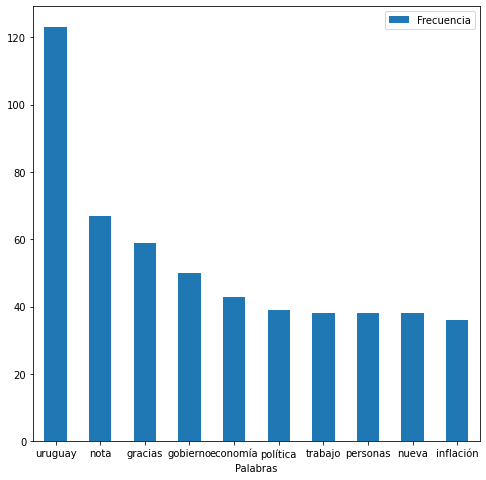

In [ ]:
from matplotlib import pyplot as plt
df_n = df_cnt.nlargest(10, 'Frecuencia')
ax = df_n.plot.bar(x='Palabras', y='Frecuencia', rot=0,figsize=(8,8))

In [ ]:
text_test = " ".join(review for review in df_cnt.Palabras)


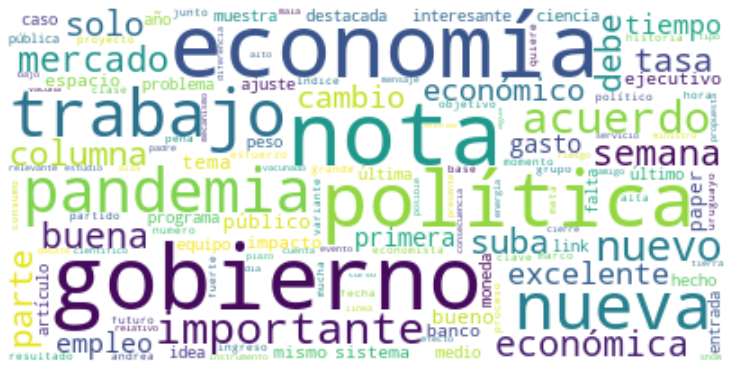

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#words_cloud = df_f['words_sin_stopwords']

#wordcloud = WordCloud(width = 800, height = 800, background_color = 'white',max_words=50,stopwords=STOPWORDS.generate(words_cloud)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50,stopwords=stopwords, max_words=250, background_color="white").generate(text_test)


fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'none',
    edgecolor = 'none')
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
wordcloud.to_file("wordcloud.png")
plt.show()

También podemos seguir arreglando la columna de publicaciones aplicando lematización en la lista de palabras

In [ ]:
import spacy_spanish_lemmatizer
import spacy
sp = spacy.load('es_core_news_md')
doc=sp(text_test)
text2 = " ".join([token.lemma_ for token in doc])


Volvemos a aplicar un wordcloud a las palabras lematizadas almacenadas en text2

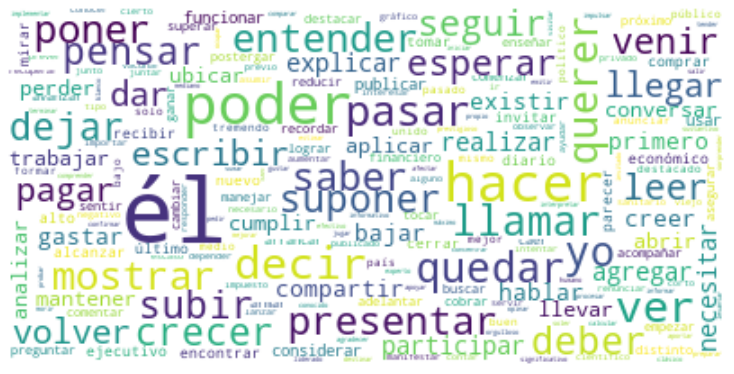

In [ ]:
#wordcloud = WordCloud(width = 800, height = 800, background_color = 'white',max_words=50,stopwords=STOPWORDS.generate(words_cloud)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50,stopwords=stopwords, max_words=250, background_color="white").generate(text2)


fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'none',
    edgecolor = 'none')
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
wordcloud.to_file("wordcloud.png")
plt.show()

**ANÁLISIS SEMÁNTICO DE LOS TWEETS**

Lo que vamos a hacer a continuación, es buscar un modelo que nos aproxime a categorizar las publicaciones de las cuentas en labels o etiquetas según lo que están publicando. El objetivo de esta parte, es aplicar un modelo que nos permita aproximar a la temática oculta de determinadas publicaciones para luego poder categorizar el resto de los tweets. 

Para este caso utilizaremos el modelo de asignación Dirichlet latente (LDA). 

In [ ]:
import pandas as pd
import numpy as np
#import re
#import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import gensim
import numpy as np
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

In [ ]:
%%time
bigram = gensim.models.Phrases(df_tmp.words_sin_stopwords.to_list())

CPU times: user 29.8 ms, sys: 5.92 ms, total: 35.7 ms
Wall time: 36 ms


In [ ]:
dictionary = Dictionary(df_tmp['words_sin_stopwords'].to_list())
dictionary.compactify()
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()

corpus = [dictionary.doc2bow(text) for text in df_tmp['words_sin_stopwords'].to_list()]

Creamos la función display_topic para que nos muestre las categorías que van resolviendo el modelo

In [ ]:
def display_topics(model, model_type="lda"):
  for topic_idx, topic in enumerate(model.print_topics()):
    print ("Topic %d:" % (topic_idx))
    if model_type== "hdp":
      print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
    else:
      print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")

Creamos la funcion evaluate_graph para indicar el score del modelo acorde a su nivel de coherencia

In [ ]:
def evaluate_graph(dictionary, corpus, texts, limit, model):
    """    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : valores coherentes que corresponden al modelo LDA con sus respectivos números de tópicos 
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        if model == 'lsi':
          lm = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        else:
          lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v


**Modelo Latent Dirichlet Allocation**

In [ ]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

Mostramos los topicos numéricos que va generando el modelo LDA

In [ ]:
display_topics(ldamodel)

Topic 0:
uruguay gobierno nota pandemia excelente país política ingresos crisis inflación 

Topic 1:
uruguay nota personas pobreza social that with internacional crisis brasil 

Topic 2:
uruguay hacer nota política gobierno parece años personas abril dólar 

Topic 3:
hoy hacia meses pandemia acuerdo educación mañana hace nota importante 

Topic 4:
gobierno observatorio covid metropolitano pandemia nueva hace económico cuánto según 

Topic 5:
nota mayor ahora unidos nacional última hogares social precios uruguay 

Topic 6:
uruguay semana inflación nueva presidente años nuevo columna mundo entrevista 

Topic 7:
trabajo inflación años economía hace with gracias nota siempre esfuerzo 

Topic 8:
gracias muchas uruguay puede observatorio casos montevideo nota cómo leer 

Topic 9:
felicitaciones observatorio entrevista director trabajo gracias políticas gran medio parece 



***Mostramos el model coherence del LDA***


In [ ]:
%%time
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_tmp['words_sin_stopwords'].to_list(), limit=21, model= "lda")

In [ ]:
ldamodel = lmlist[11]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [ ]:
lda_coherence = CoherenceModel(topics=ldatopics[:10], texts=df_tmp['words_sin_stopwords'].to_list(), dictionary=dictionary, window_size=10).get_coherence()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


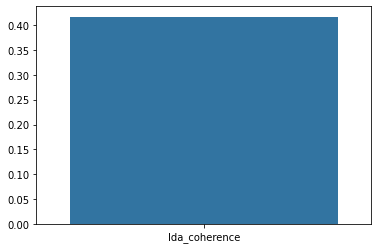

In [ ]:
import seaborn as sns

coherences = [ lda_coherence]
n = len(coherences)
x = ['lda_coherence']

sns.barplot(x, coherences)

**Clasificación de Documentos**

A continuación, realizarmos una tabla con los topicos dominantes generados de acuerdo con los keywords y cada tweets

In [ ]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0):
    # Init output
    sent_topics_df = pd.DataFrame()-n

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel, corpus=corpus, texts=df_tmp['words_sin_stopwords'].to_list())

In [ ]:

%load_ext google.colab.data_table

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.tail(35)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
1572,1572,7.0,0.8854,"uruguay, nota, pandemia, mercado, personas, se...","[hilo, recomendado, contenido, edición, econom..."
1573,1573,9.0,0.8167,"uruguay, nueva, gracias, nota, muchas, montevi...","[empleos, cotizantes, seguridad, social, gener..."
1574,1574,5.0,0.8981,"uruguay, gracias, solo, trabajo, personas, par...","[planteo, uruguayo, tibio, flexibilizar, merco..."
1575,1575,10.0,0.6944,"nota, gobierno, columna, primer, hogares, urug...","[columna, través]"
1576,1576,10.0,0.7708,"nota, gobierno, columna, primer, hogares, urug...","[columna, carlos, sténeri, través]"
1577,1577,10.0,0.7708,"nota, gobierno, columna, primer, hogares, urug...","[columna, jorge, caumont, través]"
1578,1578,9.0,0.8472,"uruguay, nueva, gracias, nota, muchas, montevi...","[primer, capítulo, serie, promete, arturo]"
1579,1579,5.0,0.7708,"uruguay, gracias, solo, trabajo, personas, par...","[vayas, gastar, ahorros]"
1580,1580,2.0,0.8981,"años, brasil, entrevista, creo, parece, acuerd...","[recuperar, empleo, repensar, recapacitación, ..."
1581,1581,4.0,0.9236,"uruguay, with, felicitaciones, director, hoy, ...","[brillante, columna, estriba, gran, película, ..."


De acuerdo a los tópicos generados, asumimos los temas y/o palabras que pueden corresponder a cada tópico. Por ende, creamos el diccionario "label_dicc" para luego reemplazar con cada uno de los tópicos dominantes que generamos y que se están en valores numéricos. De tal forma, que podamos encontrar (aproximar) una categoría o temática oculta que expresa cada tweet.

In [ ]:
label_dicc = {0:'acuerdos', 1:'personas', 2:'política_gobierno', 3: 'inflacion', 4:'vacunas', 5:'gasto', 6:'pandemia', 
              7:'política_de_vacunación', 8:'gobierno', 9: 'banco_central', 10:'país', 11:'crisis'}

In [ ]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].astype('int64')

In [ ]:
%unload_ext google.colab.data_table

df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].map(label_dicc)
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,política_gobierno,0.9167,"años, brasil, entrevista, creo, parece, acuerd...","[primer, trimestre, mantuvo, dinamismo, unidos..."
1,1,inflacion,0.9083,"uruguay, ahora, mujeres, casos, nota, gasto, a...","[respecto, relación, biden, demócratas, china,..."
2,2,gasto,0.9295,"uruguay, gracias, solo, trabajo, personas, par...","[días, haber, asumido, tras, discurso, congres..."
3,3,vacunas,0.8690,"uruguay, with, felicitaciones, director, hoy, ...","[empresa, uruguaya, pagos, expande, sudeste, a..."
4,4,gasto,0.8690,"uruguay, gracias, solo, trabajo, personas, par...","[cadena, cárnica, uruguaya, pagó, millones, dó..."
5,5,inflacion,0.7708,"uruguay, ahora, mujeres, casos, nota, gasto, a...","[biden, declares, turned, corner, pandemichis,..."
6,6,vacunas,0.9167,"uruguay, with, felicitaciones, director, hoy, ...","[president, ever, said, those, wordsit, s, abo..."
7,7,inflacion,0.9083,"uruguay, ahora, mujeres, casos, nota, gasto, a...","[uruguay, negociando, laboratorios, compra, va..."
8,8,banco_central,0.5417,"uruguay, nueva, gracias, nota, muchas, montevi...","[bergessio, trick]"
9,9,política_gobierno,0.9461,"años, brasil, entrevista, creo, parece, acuerd...","[claramente, mecanismo, obtener, vacunas, adel..."


In [ ]:
df_tmp['Temas'] = df_dominant_topic['Dominant_Topic']

In [ ]:
%unload_ext google.colab.data_table

df_tmp[['words_sin_stopwords', 'Temas']].head(20)

The google.colab.data_table extension is not loaded.


,words_sin_stopwords,Temas
0,"[primer, trimestre, mantuvo, dinamismo, unidos...",política_gobierno
1,"[respecto, relación, biden, demócratas, china,...",inflacion
2,"[días, haber, asumido, tras, discurso, congres...",gasto
3,"[empresa, uruguaya, pagos, expande, sudeste, a...",vacunas
4,"[cadena, cárnica, uruguaya, pagó, millones, dó...",gasto
5,"[biden, declares, turned, corner, pandemichis,...",inflacion
6,"[president, ever, said, those, wordsit, s, abo...",vacunas
7,"[uruguay, negociando, laboratorios, compra, va...",inflacion
8,"[bergessio, trick]",banco_central
9,"[claramente, mecanismo, obtener, vacunas, adel...",política_gobierno


REalizamos un plot de la cantidad de veces que se repiten cada uno de los tópicos identificados

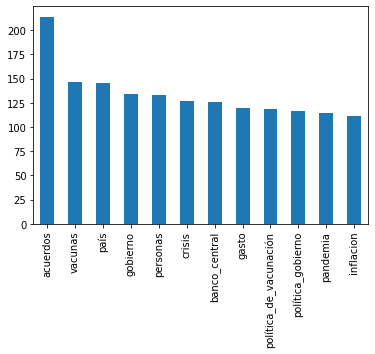

In [ ]:
ax = df_dominant_topic['Dominant_Topic'].value_counts().plot(kind='bar')
plt.show()